In [31]:
# Required Imports 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import json
import datetime, time
from matplotlib.dates import date2num
from scipy.interpolate import make_interp_spline
import argparse
import re
import sys
import matplotlib.ticker as ticker

In [2]:
# https://stackoverflow.com/a/1879011/14626757
# Returns a walked path under collected_data
def f(starting_path):
  alld = {'': {}}

  for dirpath, dirnames, filenames in os.walk(starting_path):
    d = alld
    dirpath = dirpath[len(starting_path):]
    for subd in dirpath.split(os.sep):
      based = d
      d = d[subd]
    if dirnames:
      for dn in dirnames:
        d[dn] = {}
    else:
      based[subd] = filenames
  return alld['']

  # standard code to convert data to a timestamp, metric list 
def convert_enddate_to_seconds(ts):
    """Takes ISO 8601 format(string) and converts into epoch time."""
    dt = datetime.datetime.strptime(ts[:-7],'%Y-%m-%dT%H:%M:%S')+\
                datetime.timedelta(hours=int(ts[-5:-3]),
                minutes=int(ts[-2:]))*int(ts[-6:-5]+'1')
    seconds = time.mktime(dt.timetuple()) + dt.microsecond/1000000.0
    return seconds

def convert_to_json(filename):
    # Opening JSON file
    f = open(filename)
    
    # returns JSON object as
    # a dictionary
    data = json.load(f)

    # Closing file
    f.close()
    return data

# returns 2 lists for average values, and timestamp
def get_list(timeseries):
    y = [val['average'] for val in timeseries]
    x = [pd.to_datetime(convert_enddate_to_seconds(val['timeStamp']),unit='s') for val in timeseries]
    return x,y

# 
def return_time_metric(filename):
    data = convert_to_json(filename)
    timespan = data['timespan']
    time_interval = data['interval']
    value = data['value'][0]
    name_of_graph = value['name']['value']
    timeseries = value['timeseries'][0]['data']
    x, y = get_list(timeseries)
    return x,y

def create_graph(x,y,):
    # def clean_plot(data, metric):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(x, y)   # 2021-12-31T18:36:00+00:00 2021-12-31T19:05:00+00:00


/home/krish/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/krish/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


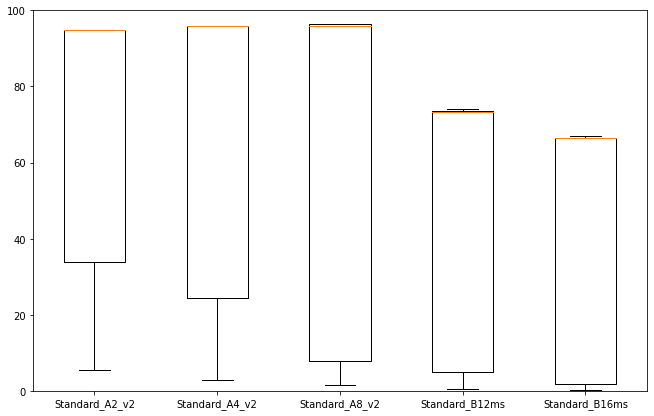

In [3]:
filepath = "../collected_data/watermelon"
api      = os.path.join(filepath, "api")
machine  = os.path.join(filepath, "machine")

api_listing     = f(api)
machine_listing = f(machine)

big_machine = {}
for size, iteration in machine_listing.items():
    metrics   = []
    timestamp = 0
    for iteration, files in iteration.items(): 
        temp_path = os.path.join(machine, size, iteration)
        timestamp, metric = return_time_metric(os.path.join(temp_path, "percentageCPU.json"))
        metrics.append(metric)
    tiny_machine = {}

    for i in range(0, len(timestamp)):
        metric_per_time = []
        for n in metrics:
            metric_per_time.append(n[i])
        metric_per_time = [float(x) for x in metric_per_time if x != None]
        tiny_machine[timestamp[i]] = np.mean(metric_per_time) #Change here to maintain value or not.
    big_machine[size] = tiny_machine


# Sort big_machine basedo n list 
machine_names = ["Standard_A2_v2","Standard_A4_v2","Standard_A8_v2","Standard_B12ms","Standard_B16ms"]
ordered_dict = {}
for item in machine_names:
    ordered_dict[item] = big_machine[item]

def do_this(machine_dict):
    ranged = []
    for key, value in machine_dict.items(): 
        ranged.append([x for x in list(value.values()) if str(x) != 'nan'])
  
    fig = plt.figure(figsize =(11, 7))
    ax = fig.add_subplot(111)
    plt.boxplot( ranged) 
    ax.set_xticklabels(list(machine_dict.keys()))
    plt.ylim(0, 100)
    plt.show()

do_this(ordered_dict)

In [30]:
# Get all values
df_files = {} 

for size, iteration in api_listing.items():
    temp_dict = {}

    for iteration, files in iteration.items(): 
        temp_path = os.path.join(api, size, iteration)
        file_name = "load.txt"
 

        with open(os.path.join(temp_path, file_name)) as f: 
            tups = []
            lines = f.readlines()
            for line in lines[8:16]: 
                line = line.split()
                tups.append((line[0],line[1]))
            temp_dict[iteration] = tups
        
    df_files[size] = temp_dict

print(df_files)

{'standardb12ms': {'f': [('50.000%', '2.08s'), ('75.000%', '3.55s'), ('90.000%', '5.17s'), ('99.000%', '10.09s'), ('99.900%', '19.71s'), ('99.990%', '26.00s'), ('99.999%', '30.39s'), ('100.000%', '32.28s')], 'i': [('50.000%', '2.09s'), ('75.000%', '3.88s'), ('90.000%', '5.82s'), ('99.000%', '11.41s'), ('99.900%', '26.80s'), ('99.990%', '34.31s'), ('99.999%', '38.04s'), ('100.000%', '41.71s')], 'g': [('50.000%', '7.21s'), ('75.000%', '12.19s'), ('90.000%', '16.89s'), ('99.000%', '25.97s'), ('99.900%', '35.52s'), ('99.990%', '44.30s'), ('99.999%', '50.17s'), ('100.000%', '0.93m')], 'h': [('50.000%', '3.13s'), ('75.000%', '5.45s'), ('90.000%', '7.84s'), ('99.000%', '13.58s'), ('99.900%', '21.61s'), ('99.990%', '28.74s'), ('99.999%', '33.10s'), ('100.000%', '36.21s')], 'e': [('50.000%', '7.15s'), ('75.000%', '11.62s'), ('90.000%', '15.90s'), ('99.000%', '24.79s'), ('99.900%', '33.82s'), ('99.990%', '40.83s'), ('99.999%', '46.10s'), ('100.000%', '50.40s')], 'a': [('50.000%', '4.22s'), ('75.

In [32]:

regex = re.compile(r'\s+([0-9.]+)\s+([0-9.]+)\s+([0-9.]+)\s+([0-9.]+)')
filename = re.compile(r'(.*/)?([^.]*)(\.\w+\d+)?')

def parse_percentiles( file ):
    lines       = [ line for line in open(file) if re.match(regex, line)]
    values      = [ re.findall(regex, line)[0] for line in lines]
    pctles      = [ (float(v[0]), float(v[1]), int(v[2]), float(v[3])) for v in values]
    percentiles = pd.DataFrame(pctles, columns=['Latency', 'Percentile', 'TotalCount', 'inv-pct'])
    return percentiles


def parse_files( files ):
    return [ parse_percentiles(file) for file in files]


def info_text(name, data):
    textstr = '%-18s\n------------------\n%-6s = %6.2f ms\n%-6s = %6.2f ms\n%-6s = %6.2f ms\n'%(
        name,
        "min",    data['Latency'].min(),
        "median", data.iloc[(data['Percentile'] - 0.5).abs().argsort()[:1]]['Latency'],
        "max",    data['Latency'].max())
    return textstr


def info_box(ax, text):
    props = dict(boxstyle='round', facecolor='lightcyan', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, text, transform=ax.transAxes,
        verticalalignment='top', bbox=props, fontname='monospace')


def plot_summarybox( ax, percentiles, labels ):
    # add info box to the side
    textstr = '\n'.join([info_text(labels[i], percentiles[i]) for i in range(len(labels))])
    info_box(ax, textstr)


def plot_percentiles( percentiles, labels ):
    fig, ax = plt.subplots(figsize=(16,8))
    # plot values
    for data in percentiles:
        ax.plot(data['Percentile'], data['Latency'])

    # set axis and legend
    ax.grid()
    ax.set(xlabel='Percentile',
           ylabel='Latency (milliseconds)',
           title='Latency Percentiles (lower is better)')
    ax.set_xscale('logit')
    plt.xticks([0.25, 0.5, 0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999])
    majors = ["25%", "50%", "90%", "99%", "99.9%", "99.99%", "99.999%", "99.9999%"]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(majors))
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
               loc=3, ncol=2,  borderaxespad=0.,
               labels=labels)

    return fig, ax


def arg_parse():
    parser = argparse.ArgumentParser(description='Plot HDRHistogram latencies.')
    parser.add_argument('files', nargs='+', help='list HDR files to plot')
    parser.add_argument('--output', default='latency.png',
                        help='Output file name (default: latency.png)')
    parser.add_argument('--title', default='', help='The plot title.')
    parser.add_argument("--nobox", help="Do not plot summary box",
                        action="store_true")
    args = parser.parse_args()
    return args


def main(filenames):
    # print command line arguments
    args = arg_parse()

    # load the data and create the plot
    pct_data = parse_files(args.files)
    labels = [re.findall(filename, file)[0][1] for file in args.files]
    # plotting data
    fig, ax = plot_percentiles(pct_data, labels)
    # plotting summary box
    if not args.nobox:
        plot_summarybox(ax, pct_data, labels)
    # add title
    plt.suptitle(args.title)
    # save image
    plt.savefig(args.output)
    print( "Wrote: " + args.output)